<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Александр! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Don't you know that you're toxic?

## Введение

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**План**

1. EDA
2. Data engineering
3. Modeling

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела. 
     
    
 

<div class="alert alert-warning">


Совет: 
   
Вопросик, при желании можешь ответить )
    
    
- а почему по твоему была выбрана метрика f1? 
    
    
- а что если бы нам было нужно найти как можно больше токсичных комментариев, в этом случаи на какую метрику мы бы ориентировались?
    
    
- каким образом мы можем изменить функцию ошибки в модели, чтобы она максимизировала интересующую нас метрику (accuracy, f1, precision, roc-auc итп)?    



</div>

<div class="alert alert-info">
    Привет. 
    
- Поскольку классы разбалансированны Accuracy не подходит. Precision найдет нам правильные ответы из всех отнеенных к классу 1. Recall покажет сколько мы не нашли правильных ответов. Нам хотелось бы знать сколько твитов токсичные(Recall) и как точно мы это определяем(Precision). Для этого нам нужна f1 мера. Она объединит в себе Precision и Recall. 
    
- Если нам надо найти как можно больше токсичных комментариев подойдет Recall, но мы можем захватить лишние комментарии в таком случае.
    
- Использовать кросс-валидацию.
    
</div>

### import

In [200]:
# импорт функций

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from langdetect import detect
import spacy
from tqdm.notebook import tqdm
from wordcloud import WordCloud

# models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC

# feature extraction
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from nltk.probability import FreqDist

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# metric
from sklearn.metrics import f1_score

# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

- Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 



<div class="alert alert-warning">

Совет:     

- у тебя тут есть лишние импорты, то что ты не используешь - стоит убрать, чтобы поберечь ресурсы, это особенно важно в этом проекте      


- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), это на будущее


<div>



## EDA

### Загрузка датасета и первичный осмотр данных

In [3]:
try:
    data = pd.read_csv('toxic_comments.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')
    

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Если не знаешь - чтобы не было столбца  `Unnamed: 0` при чтении файла можно так:


    pd.read_csv(..., index_col=0)

    
(`Unnamed: 0` появляется при не совсем корректном сохранении файла)    

<div>

In [4]:
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [6]:
data['Unnamed: 0'].duplicated().sum()

0

In [7]:
data['text'].duplicated().sum()

0

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены. Небольшой EDA не помешает, так как это аналитический проект. 


    
    
<div class="alert alert-warning">

Совет: 



- стоило ТУТ проверить на сбалансированность классов 
    
    
- .sample вместо .head, ведь если данные каким то образом упорядоченны, то шансы увидеть что то разнообразное через .sample чуть выше чем через .head (или .tail)     
   





</div>




### Проверка языка твитов -  не исполнять!!!!!

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Не забываем поднимать импорты наверх

</div>

<div class="alert alert-info">
Поднял.
    
</div>

In [7]:
def func(x):
    try:
        return detect(x)
    except:
        return '-1'


data['lang'] = data['text'].apply(func)

In [8]:
data['lang'].value_counts()

en    154924
de       588
fr       375
af       342
so       283
et       263
id       250
cy       220
nl       211
sv       177
no       173
tl       166
it       161
da       155
ca       123
tr       120
es       106
hu        84
pt        79
ro        78
sw        68
fi        59
vi        56
pl        44
hr        36
sl        35
sk        28
-1        25
sq        22
cs        22
lt        10
lv         3
el         1
ta         1
bg         1
mk         1
uk         1
ja         1
Name: lang, dtype: int64

Посмотрим на твиты на языках отличных от английского

In [35]:
# явная ошибка разметки
data.iloc[119018,1]

'  """'

In [31]:
data[data['lang'] == '-1']

,Unnamed: 0,text,toxic,lang
1474,1474,"""\n\n-————————————————————————————————————————...",1,-1
4475,4475,1993\n\n1994\n\n1995\n\n1996\n\n1997\n\n1998\n...,0,-1
6182,6186,http://www.imdb.com/name/nm2551199/filmoseries...,0,-1
6289,6293,193.61.111.53 15:00,0,-1
10193,10206,"64.86.141.133""",0,-1
17280,17297,~ \n\n68.193.147.157,0,-1
38743,38792,"88.104.31.21""",0,-1
41556,41606,[ ]\nhttp://www.smallholder.co.uk/news/87898...,0,-1
52336,52393,"14:53,",0,-1
53679,53740,92.24.199.233|92.24.199.233]],0,-1


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Прикольная функция )


Обычно из текста просто убирает буквы не на латинице, возможно твой подход лучше, но для проверки стоило бы вывести парочку предложений не на английском чтобы убедиться

</div>


<div class="alert alert-info">

Фиаско с этой функцией, в другие языки попал сленг, названия и имена отличные от английских. При этом сам текст можно интерпретировать, как английский. Из плюсов, только строки отмеченные "-1". В них попали всякие ссылки и тому подобная бессмыслица.
    
Вообще судя по бенчмарку результаты не очень у всех похожих библиотек. https://towardsdatascience.com/benchmarking-language-detection-for-nlp-8250ea8b67c
    
Поскольку имеено сленг обычно является токсичным, оставляю датасет как есть.
    
</div>

### Вывод

Данные без пропусков и дубликатов

## Data engineering

In [8]:
corpus = data['text']

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:



Да, в тренажере был текст на кирилице, там перевод в unicode оправдан. В нашем случае (латиница) это лишь  увеличит количество потребляемой памяти и это в лучшем случаи, в худшем он обрушает ядро.





</div>

<div class="alert alert-info">
Понятно. Не подумал.
    
</div>

### Очистка твитов

- Удаляем биржевые символы $GE
- Удаляем символ ретввита “RT”
- Удаляем гиперссылки
- Удаляем символ хэш
- Удаляем стоп слова такие как: a, and, the, is, are, etc.
- Удаляем смайлы такие как: :), :D, :(, :-), etc.
- Удаляем знакм препинания
- Лемматизация.

In [9]:
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [10]:
stopwords_english = nltk_stopwords.words('english')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Не забыли о стопсловах, они ни к чему и код побежит быстрей

    
<div class="alert alert-warning">


Совет:     

Вопросик:

А стопслова важней убирать  когда мы используем TF-IDF, или когда используе обычный CountVectorizer? 



<div class="alert alert-info">
Для CountVectorizer важнее убрать бессмысленые слова. Поскольку это обычно вспомогательные слова, они имеют тенденцию употреблятся часто. А частота употребления слов как раз и есть то что мы ищем в этом случае. Соответственно бессмысленные слова будут как признаки будут иметь высокую важность, хотя это противоречет логике. 
    
TF-IDF снижает зависимость от бессмысленных слов за счет деления на число появления этих слов во всех документах. 
    
С точки зрения вычислительных ресурсов шумы вредны во всех случаях. 
    
</div>

In [132]:
# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [133]:
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    #remove numders
    tweet = re.sub(r'[0-9]', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []   
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            lem_word = nlp(word) 
            tweets_clean.append(''.join([token.lemma_ for token in lem_word])) # lemmatization

    return tweets_clean

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Stemmer это хорошо, но это хуже чем Лемматизация.  Без нее у нас одни и те же слова стоящие в разных падежах и временах будут расцениваться как разные, в итоге колличество фичей раздувается, а качество прогноза будет падать. 


Набираемся ума-разума [тут](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/) ) . Там примеры разных библиотек для лемматизации, выбирай на свой вкус ). Рекомендую WordNetLemmatizer (но не забыть о POS тег, используй функцию `get_wordnet_pos` из примера и обрати внимание на то что WordNetLemmatizer на лемматизацию принимает не предложение, а слово) или [SpaCy](https://spacy.io/).  

<div class="alert alert-warning">


Совет: 
    


- хорошо бы ещё привести к нижнему регистру, для уменьшения количества слов, и лучшей работы модели


    
- после очистки и лемитизации можно провести частотный анализ текста/[облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встерчаемых словах Кроме того графики, рисунки делают проект визуально интересней
    
    

</div>


In [134]:
# check
print(corpus[15])
clean_tweets(corpus[15])

"

Juelz Santanas Age

In 2002, Juelz Santana was 18 years old, then came February 18th, which makes Juelz turn 19 making songs with The Diplomats. The third neff to be signed to Cam's label under Roc A Fella. In 2003, he was 20 years old coming out with his own singles ""Santana's Town"" and ""Down"". So yes, he is born in 1983. He really is, how could he be older then Lloyd Banks? And how could he be 22 when his birthday passed? The homie neff is 23 years old. 1983 - 2006 (Juelz death, god forbid if your thinking about that) equals 23. Go to your caculator and stop changing his year of birth. My god."


['juelz',
 'santana',
 'age',
 'juelz',
 'santana',
 'year',
 'old',
 'come',
 'february',
 'th',
 'make',
 'juelz',
 'turn',
 'make',
 'song',
 'diplomat',
 'third',
 'neff',
 'sign',
 "cam's",
 'label',
 'roc',
 'fella',
 'year',
 'old',
 'come',
 'single',
 "santana's",
 'town',
 'yes',
 'bear',
 'really',
 'could',
 'old',
 'lloyd',
 'bank',
 'could',
 'birthday',
 'pass',
 'homie',
 'neff',
 'year',
 'old',
 'juelz',
 'death',
 'god',
 'forbid',
 'think',
 'equal',
 'go',
 'caculator',
 'stop',
 'change',
 'year',
 'birth',
 'god']

In [68]:
# разобьем на чанки для уменьшения использования памяти
chunks = np.array_split(corpus, 10)
for chunk in chunks:
    print(chunk.shape, end='')

(15930,)(15930,)(15929,)(15929,)(15929,)(15929,)(15929,)(15929,)(15929,)(15929,)

In [69]:
tqdm.pandas()

In [137]:
tokenized_corpus = pd.Series()
for chunk in chunks:
    tokenized_corpus = pd.concat([tokenized_corpus, chunk.progress_apply(clean_tweets)])

  0%|          | 0/15930 [00:00<?, ?it/s]

  0%|          | 0/15930 [00:00<?, ?it/s]

  0%|          | 0/15929 [00:00<?, ?it/s]

  0%|          | 0/15929 [00:00<?, ?it/s]

  0%|          | 0/15929 [00:00<?, ?it/s]

  0%|          | 0/15929 [00:00<?, ?it/s]

  0%|          | 0/15929 [00:00<?, ?it/s]

  0%|          | 0/15929 [00:00<?, ?it/s]

  0%|          | 0/15929 [00:00<?, ?it/s]

  0%|          | 0/15929 [00:00<?, ?it/s]

In [138]:
tokenized_corpus.head()

0    [explanation, edit, make, username, hardcore, ...
1    [d'aww, match, background, colour, Ibe, seemin...
2    [hey, man, Ibe, really, try, edit, war, guy, c...
3    [cannot, make, real, suggestion, improvement, ...
4          [sir, hero, chance, remember, page, thatbe]
dtype: object

In [139]:
# check
tokenized_corpus.tail()

159287    [::, second, time, ask, view, completely, cont...
159288    [ashamed, horrible, thing, put, talk, page, . ...
159289    [spitzer, umm, theres, actual, article, prosti...
159290    [look, like, actually, put, speedy, first, ver...
159291    [..., really, think, understand, come, idea, b...
dtype: object

In [142]:
# сохраним результат работы
#tokenized_corpus.to_csv('tokenized_corpus.csv')


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


- попробуй .progress_apply, делает что .apply, но еще и показывает на какой итерации находится процесс


    
- выведи результат своей работы    

### Freq dist

In [153]:
freq_dict = FreqDist()
for line in tokenized_corpus:
    for word in line:
        freq_dict[word] +=1

In [154]:
freq_dict

FreqDist({'article': 71722, 'page': 56029, 'wikipedia': 42803, 'edit': 39859, 'talk': 38986, 'use': 32522, 'make': 30109, 'please': 29629, 'one': 29442, 'would': 29005, ...})

In [162]:
freq_dict.most_common(15)

[('article', 71722),
 ('page', 56029),
 ('wikipedia', 42803),
 ('edit', 39859),
 ('talk', 38986),
 ('use', 32522),
 ('make', 30109),
 ('please', 29629),
 ('one', 29442),
 ('would', 29005),
 ('like', 28252),
 ('see', 26933),
 ('...', 25999),
 ('think', 25512),
 ('say', 25164)]

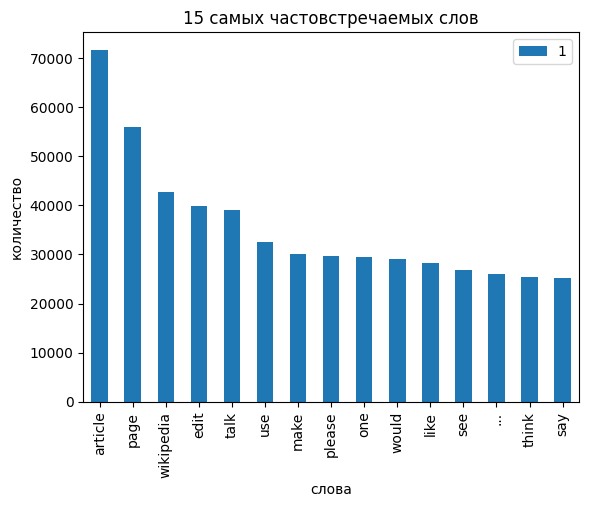

In [183]:
pd.DataFrame(freq_dict.most_common(15)).set_index(0).plot(kind='bar')
plt.xlabel('слова')
plt.ylabel('количество')
plt.title("15 самых частовстречаемых слов")
plt.show()

Вывод: В списке часто встречаемых слов можно найти "...". Это кандидат на удаление.

### Word cloud

In [188]:
wordcloud = WordCloud(max_words=50).generate_from_frequencies(freq_dict)

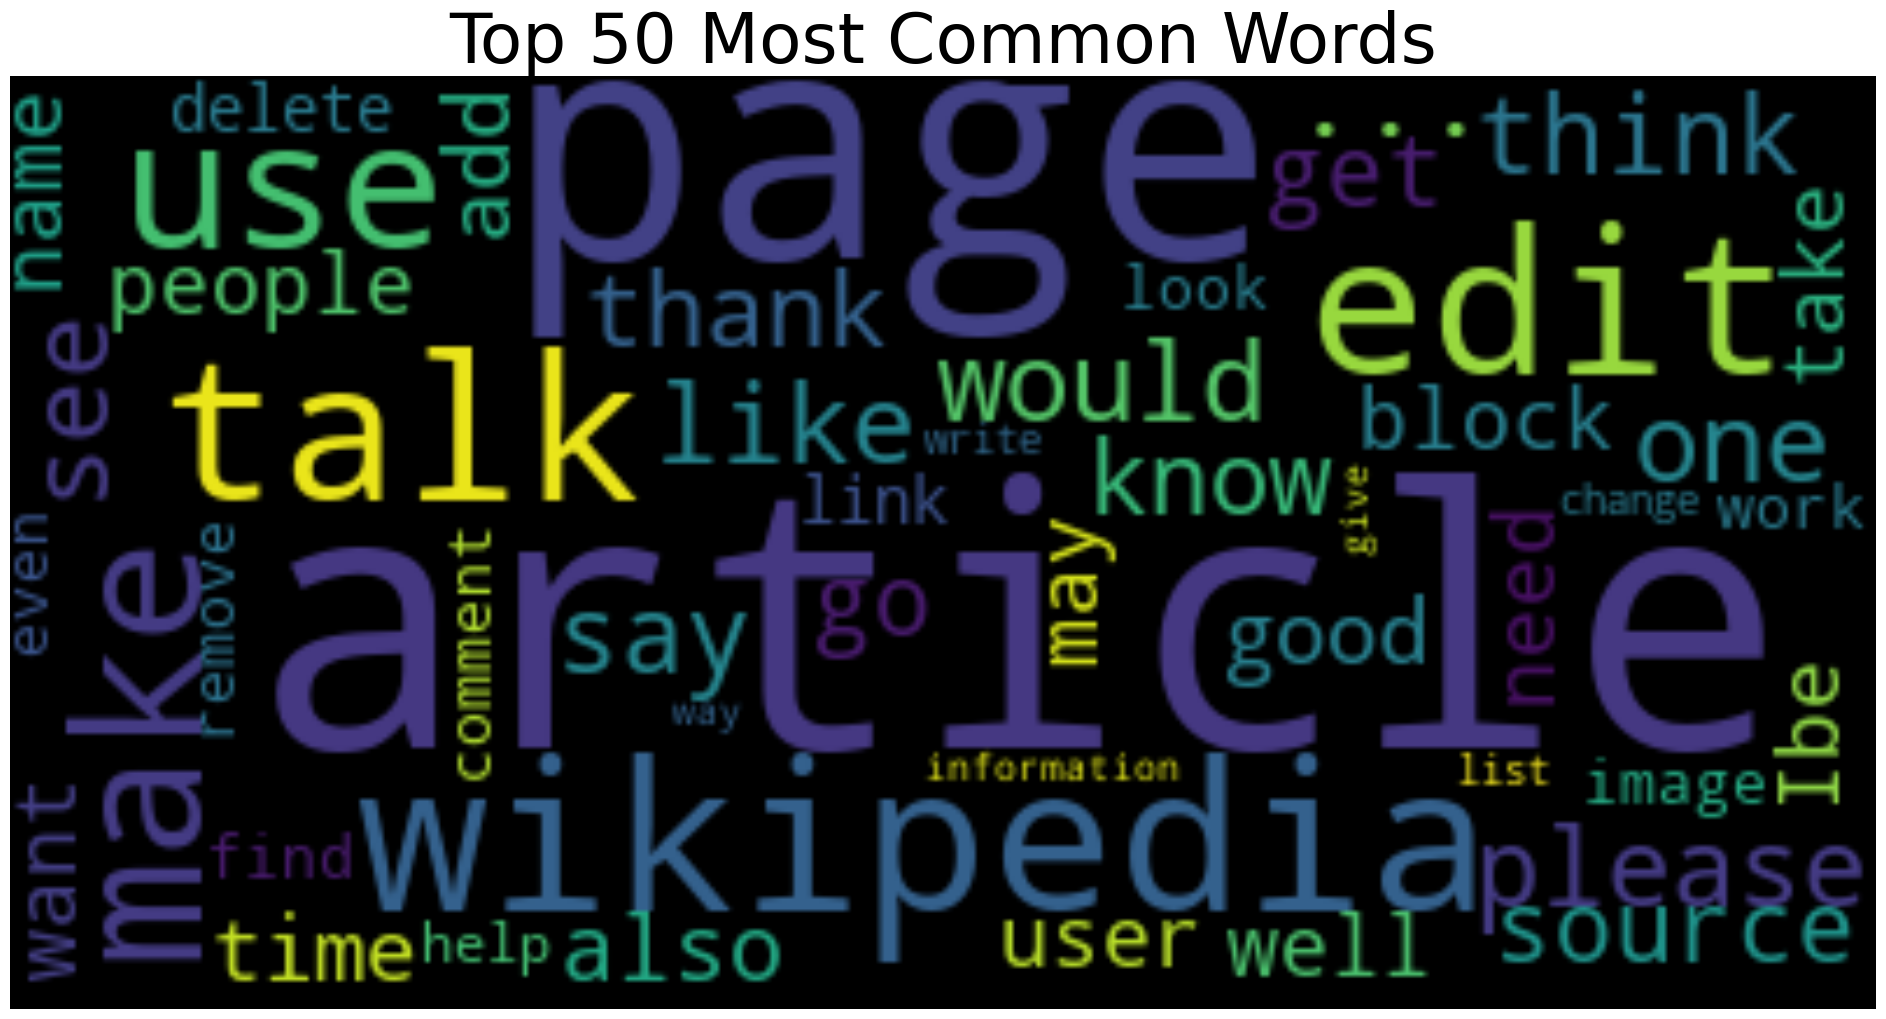

In [189]:
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [217]:
# сформируем список слов на удалние
word_to_del = ['article', 'page', 'wikipedia', '...']

### Vectorizer

In [190]:
# создаем текст для векторизации
corpus = tokenized_corpus.progress_apply(lambda x: " ".join(x))

  0%|          | 0/159292 [00:00<?, ?it/s]

In [218]:
vectorizer = TfidfVectorizer(stop_words=word_to_del)

In [192]:
target = data['toxic']

In [193]:
# разобъем на трейн, тест.
X, X_t,  y,  y_t = train_test_split(corpus, target, test_size=0.25, random_state=42, stratify=target)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:






- здорово что используешь stratify    




In [194]:
X.shape, y.shape, X_t.shape, y_t.shape

((119469,), (119469,), (39823,), (39823,))

<AxesSubplot: >

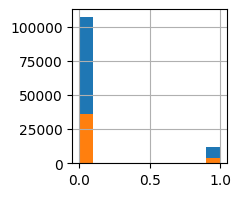

In [195]:
fig, ax = plt.subplots(figsize=(2,2))
y.hist();
y_t.hist()

In [196]:
1 - y.sum()/y.count()

0.8983836811222995

In [197]:
1 - y_t.sum()/y_t.count()

0.8984004218667604

In [198]:
X_vect = vectorizer.fit_transform(X)
X_vect.shape

(119469, 124131)

### Вывод

Мы провели очистку твитов и подготовили данные для обучения. Данные сильно разбалансированы.

## Model

### Pipeline

In [219]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=word_to_del)),
    ('clf', DummyClassifier()),
])

In [220]:
params = [{
    'clf': [LogisticRegression(random_state=42)],
    'clf__class_weight': ['balanced'],
    'clf__C': [0.001, 0.01, 0.1, 1, 10]
},
    {   
    'clf':[LinearSVC(random_state=42)],
    'clf__class_weight': ['balanced'],
    'clf__C': [0.001, 0.01, 0.1, 1, 10]
}]

In [221]:
grid = GridSearchCV(pipe,
                    params, 
                    cv=5, 
                    n_jobs=-1, 
                    verbose=3, 
                    scoring='f1')

In [222]:
model = grid.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [223]:
model.best_estimator_

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['article', 'page', 'wikipedia',
                                             '...'])),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced',
                                    random_state=42))])

In [224]:
model.best_score_

0.7624265328534666

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа НЕ выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле или с использованием GridSearchCV



### Dummy

In [225]:
dummy = DummyClassifier(random_state=42, strategy = 'constant', constant = 1)
dummy.fit(X_vect, y)

DummyClassifier(constant=1, random_state=42, strategy='constant')

In [226]:
f1_score(y, dummy.predict(X_vect))

0.1844858634287929

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

А если так:
    
    
    model = DummyClassifier(strategy = 'constant', constant = 1)

    
    
    
</div>


### Вывод

Мы проверили 2 модели LogisticRegression и LinearSVC. Луший результат показала модель LogisticRegression - 0.76. Модель прошла проверку на адекватность. ПО сравнению с DummyClasifier с результатом 0,18.

## Test

In [228]:
f1_score(y_t, model.predict(X_t))

0.7648069652881201

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 

- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель отобранную на валидации, или парочку лучших, если на валидации результаты близки


- Если студент получил на тесте f1 выше 0,75, это считается приемлемым результатом.


<div class="alert alert-warning">


Совет: 

Что может помочь добиться лучшего результата (от простого)? 

    
    
- использовать stratify. Done!
    



- учесть дисбаланс класов в таргете. (но не oversampling, это скользкая дорожка, через class_weight) 


    

- полезно настраивать векторайзеры (тут пригодится pipeline)


  
    
- подобрать лучшие гиперпараметры с использованием кроссвалидации (тут пригодится GridSearchCV) 
    
    
    

- сгенерировать новые фичи, например  например посчитать число слов в тексте, длину слов итп итд. Или с помощью [тематического моделирования](https://pythobyte.com/python-for-nlp-topic-modeling-8fb3d689/) / использовать ембединги слов, учитывающие семантику, например [word2vec](https://radimrehurek.com/gensim/models/word2vec.html)) 
    
    
    

- попробовать другие модели. проект своеобразный выбор между вычислительными ограничениями (много примеров, расчеты могут затянуться) и задачей получить хорошую метрику (как это и бывает на практике), поэтому советовать "тяжелые", но мощные модели, чтобы у тебя все окончательно не повисло не буду (хотя есть вариант попробовать сделать на GPU).  А вот попробовать простые модели: SVC, NBC, логистическая регрессия, которые хорошо отработают с разряженными матрицами, могу. Простые модели - зато используем весь датасет. Done!


    
    
- Использование предбученной модели Берта, выбрав соответствующую модель и используя полученные эмбединги, даже на небольшом тренировочном датасете можно обучить модель, которая на test покажет хорошую метрику

</div>


## Вывод

В данном проекте мы  Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

На первом этапе был проведен осмотр датасета. Дубликатов и пропусков не выявлено. Языковой анализ показал, что датасет состоит из твитов на английском языке.

На втором этапе была проведена очистка твиотов и лемматизация. Очистка состояла из следующих этапов:
- Удаляем биржевые символы $GE
- Удаляем символ ретввита “RT”
- Удаляем гиперссылки
- Удаляем символ хэш
- Удаляем стоп слова такие как: a, and, the, is, are, etc.
- Удаляем смайлы такие как: :), :D, :(, :-), etc.
- Удаляем знакм препинания
- Лемматизация с помощью пакета spacy.

На третьем этапе был проведен частотный анализ корпуса и сформирован список слов на удаление. 

На 4 этапе было проведено моделирование. В ходе моделирования использовалось 2 модели LogisticRegression и LinearSVC. Луший результат показала модель LogisticRegression - 0.76. Модель прошла проверку на адекватность. ПО сравнению с DummyClasifier с результатом 0,18.

На 5 этапе был проведен тест лучшей модели. Мы получили значение метрики 0.76, что лучше необходимого по заданию значения(0.75)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

В конце проекта принято кратко описывать все проделанные шаги и полученные результаты. Зачем это нужно - когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому все же советую написать общий вывод пообьемней: добавить пару слов о данных, работе с ними, о моделях, метриках


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Александр, у тебя интересная работа, оригинальная.
    



Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить).
    



Обязательное к исправлению:




- импорты собираем в одну ячейку, чтобы легче контролировать их




- не забываем делать Лематизацию 




- .astype('U') лишнее, стоит экономить ресурсы, иначе может даже ядро обрушиться



- нет перебора гиперпараметров. 
    
    
    
- лучшую модель выбираешь по метрике на тренировочной, а делаем это по валидационной - нарушение логики использования датасетов    
    
    
- стоит дополнить общий вывод - лицо проекта
    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


</div>
